## Chaos

`LogisticCobweb.py`, adapted from http://csc.ucdavis.edu/~chaos/courses/nlp/Software/PartE_Code/LogisticCobweb.py

  - Plot the Logistic Map's quadratic function
  - And show iterating from an initial condition 

In [17]:

# Import modules
from numpy import *
# Plotting
from pylab import *


 Define the Logistic map's function 

In [18]:
def LogisticMap(r,x):
	return r * x * (1.0 - x)


In [19]:
# Setup x array
# Note how we make sure x = 1.0 is included
x = arange(0.0,1.01,0.01)
# We set r = 3.678, where two bands merge to one
r = 3.678


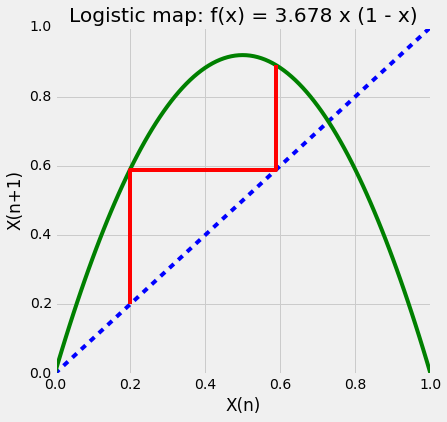

In [20]:
# Setup the plot
# It's numbered 1 and is 6 x 6 inches, to make the plot square.
# On my display this didn't turn out to be square, so I've fudged.
figure(1,(6,5.8))
# Note how we turn the parameter value into a string
#   using the string formating commands.
TitleString = 'Logistic map: f(x) = %g x (1 - x)' % r
title(TitleString)
xlabel('X(n)')   # set x-axis label
ylabel('X(n+1)') # set y-axis label

# We plot the identity y = x for reference
plot(x, x, 'b--', antialiased=True)

# Here's the Logistic Map itself
plot(x, LogisticMap(r,x), 'g', antialiased=True)

# ... and its second iterate
# Set the initial condition
state = 0.2
# Establish the arrays to hold the line end points
x0 = [ ] # The x_n value
x1 = [ ] # The next value x_n+1
# Iterate for a few time steps
nIterates = 2
# Plot lines, showing how the iteration is reflected off of the identity
for n in arange(nIterates):
	x0.append( state )
	x1.append( state )
	x0.append( state )
	state = LogisticMap(r,state)
	x1.append( state )

# Plot the lines all at once
plot(x0, x1, 'r', antialiased=True)

----

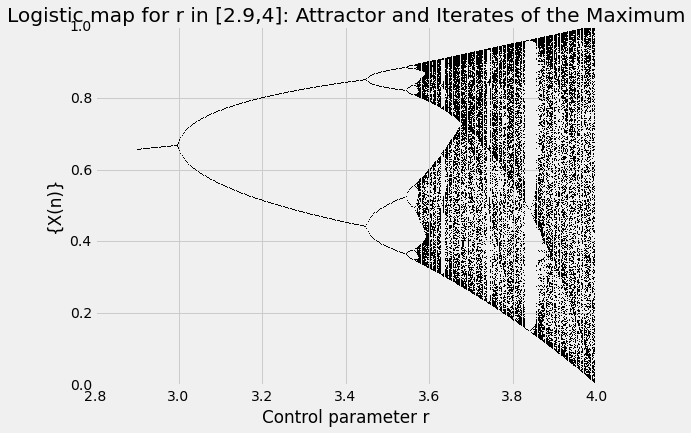

In [23]:
# LogisticXMax.py:
#   What are those "veils" in the bifurcation diagram?
#	Overlay iterates of the map's maximum on a Logistic bifurcation diagram.

# Import modules
from numpy import *
from pylab import *

# Define the Logistic map's function 
def LogisticMap(r,x):
	return r * x * (1.0 - x)

# Setup parameter range
rlow  = 2.9
rhigh = 4.0

# Setup the plot
# It's numbered 1 and is 8 x 6 inches.
figure(1,(8,6))
# Stuff parameter range into a string via the string formating commands.
TitleString = 'Logistic map for r in [%g,%g]: Attractor and Iterates of the Maximum ' % (rlow,rhigh)
title(TitleString)
# Label axes
xlabel('Control parameter r')
ylabel('{X(n)}')

# Set the initial condition used across the different parameters
ic = 0.2
# Establish the arrays to hold the set of iterates at each parameter value
rsweep = [ ] # The parameter value
x = [ ] # The iterates
# The iterates we'll throw away
nTransients = 500
# This sets how much the attractor is filled in
nIterates = 250
# This sets how dense the bifurcation diagram will be
nSteps = 400.0



# First, the bifurcation diagram
# Sweep the control parameter over the desired range
for r in arange(rlow,rhigh,(rhigh-rlow)/nSteps):
	# Set the initial condition to the reference value
	state = ic
	# Throw away the transient iterations
	for i in arange(nTransients):
		state = LogisticMap(r,state)
	# Now store the next batch of iterates
	for i in arange(nIterates):
		state = LogisticMap(r,state)
		rsweep.append(r)
		x.append( state )

# Plot the list of (r,x) pairs as pixels
plot(rsweep, x, 'k,')




In [ ]:

# Now for the iterates of the logistic map's maximum
# The map's maximum is at 1/2.
ic = 0.5
nItsMax = 6
# Sweep the control parameter over the desired range
for nIts in arange(nItsMax):
	# Establish the arrays and clear them
	rsweep = []
	x = []
	for r in arange(rlow,rhigh,(rhigh-rlow)/nSteps):
		rsweep.append(r)
		# Set the initial condition to the reference value
		state = ic
		# Store the nIts iterate of the map; we iterate at least once
		for i in arange(nIts+1):
			state = LogisticMap(r,state)
		x.append( state )
	plot(rsweep, x, 'r-')

# Use this to save figure as a bitmap png file
#savefig('LogisticXMax', dpi=600)

# Display plot in window
show()